In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1. Count of one categorical feature

In [6]:
df['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

Keterangan jenis fondasi rumah:
<ul>
<li>BrkTil = Brick & Tile (bata dan ubin)</li>
<li>CBlock = Cinder Block</li>
<li>PConc = Poured Concrete (beton)</li>
<li>Slab = Slab</li>
<li>Stone = Stone</li>
<li>Wood = Wood</li>
</ul>

In [7]:
df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

Berdasarkan hasil penghitungan di atas:
<ul>
<li>Sebagian besar rumah yang dijual menggunakan fondasi beton (647 rumah) dan fondasi cinder block (643 rumah)</li>
<li>Sebagian kecil rumah lainnya menggunakan fondasi bata dan ubin (146 rumah)</li>
<li>Rumah lainnya: menggunakan fondasi slab/lempeng (24 rumah), fondasi batu (6 rumah), fondasi kayu (3 rumah)</li>
</ul>

In [14]:
df_new = df.copy()
df_new.replace({'Foundation':{'PConc':'Poured Concrete','CBlock':'Cinder Block','BrkTil':'Brick & Title','Slab':'Others','Stone':'Others','Wood':'Others'}}, inplace=True)
df_new['Foundation'].value_counts()

Poured Concrete    647
Cinder Block       634
Brick & Title      146
Others              33
Name: Foundation, dtype: int64

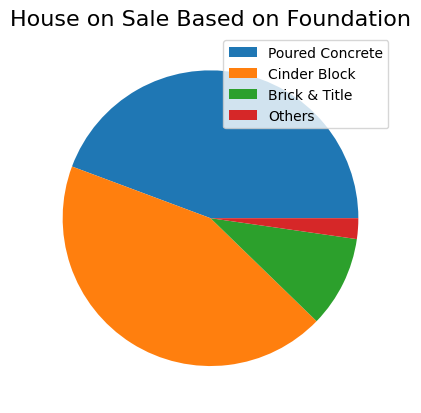

In [16]:
#Proporsi jenis fondasi rumah dari data perumahan
plt.pie(df_new['Foundation'].value_counts())
plt.legend(df_new['Foundation'].unique())
plt.title('House on Sale Based on Foundation', fontsize=16)
plt.show() 

# 2. Distribution of one continuous feature

In [19]:
df_new['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

data tidak memiliki nilai minus, namun mean lebih besar dari median, menandakan data memiliki distribusi menceng kanan atau positive skewnes

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

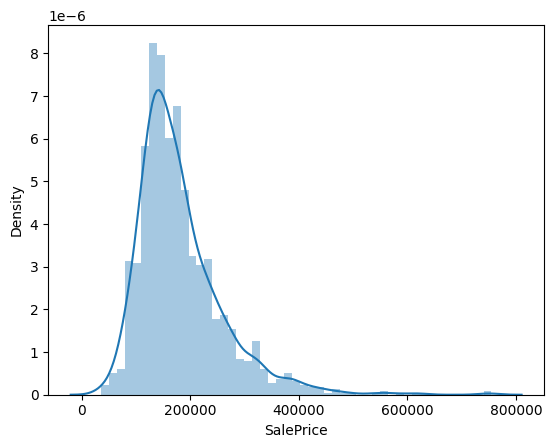

In [20]:
sns.distplot(df_new['SalePrice'])

<ul>
<li>Grafik menunjukkan bahwa rata - rata harga rumah yang dijual memiliki nilai lebih tinggi dari pada nilai tengah sebarannya.</li>
<li>Sebagian besar rumah yang dijual dengan sale price pada kisaran harga 100000 - 400000</li>
<li>Sebagian kecil rumah lainnya dijual dengan harga >400000 hingga 800000</li>
</ul>

# 3. Categorical-continuous

kolom data yang digunakan:
<ul>
<li>data kategorikal <b>'OverallCond'</b> = Rating of the overall condition of the house: 10 = Very Excellent, 9 = Excellent, 8 = Very Good, 7 = Good, 6 = Above Average, 5 = Average, 4 = Below Average, 3 = Fair, 2 = Poor, 1 = Very Poor </li>
<li>Data continuous <b>'SalePrice'</b></li>
</ul>

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

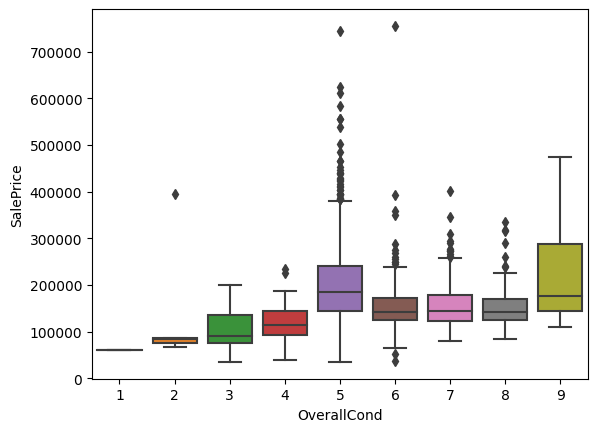

In [21]:
sns.boxplot(y=df_new['SalePrice'],x=df_new['OverallCond'])

# 4. Continuous-continuous

Kolom data yang digunakan:
<ul>
<li>GarageArea : Luas garasi dalam square feet</li>
<li>SalePrice : Harga Sale (Harga Rumah)</li>
</ul>

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

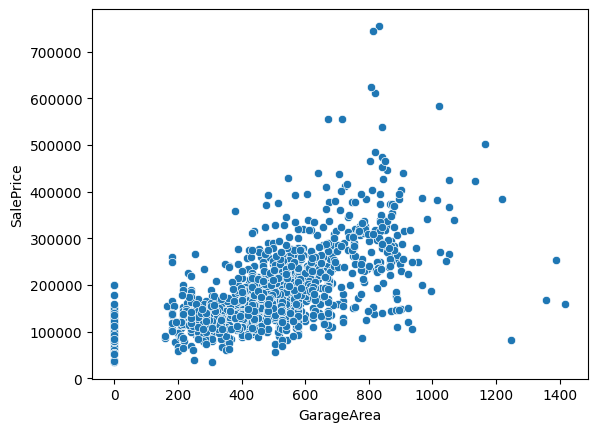

In [22]:
sns.scatterplot(y=df_new['SalePrice'],x=df_new['GarageArea'])

<b>Insight:</b>
<ul>
<li>Kebanyakan rumah yang dijual memiliki luas area garasi antara 200 - 1000 feet square</li>
<li>Harga jual rumah memiliki korelasi dengan luas garasi : rumah yang dijual dengan garasi lebih luas cenderung memiliki harga lebih mahal, begitu juga sebaliknya, rumah dengan luas garasi yang kecil cenderung lebih murah</li>
<li>Meski demikian rumah dengan garasi paling luas tidak menjadi rumah yang paling mahal (dimungkinkan ada faktor variabel lain semisal kualitas rumah, luas bangunan rumah, dll)</li>
</ul>